In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=[8,3]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mounted drive code for everyone
Steps: create a shortcut of the Shared Drive to your own drive. The below dataset file path should work for everyone.

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Capstone | GenAI | Fall 2024/customer_churn_dataset-training-master.csv")
test = pd.read_csv("/content/drive/MyDrive/Capstone | GenAI | Fall 2024/customer_churn_dataset-testing-master.csv")

In [ ]:
df=pd.concat([train,test],axis=0)
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [ ]:
bins = [18, 25, 35, 45, 55, 66]
labels = ['18-24', '25-34', '35-44', '45-54', '55-65']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Age Group
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,25-34
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,55-65
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,55-65
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,55-65
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,18-24


In [ ]:
# check dimensions of the dataset, we found it has 505,206 rows and 12 columns
print(df.shape)
print('Columns:', df.columns)
df.describe() # Get the Simple Summary Statistics

(505207, 13)
Columns: Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn',
       'Age Group'],
      dtype='object')


,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,200779.451782,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,137241.343095,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,63827.250000,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,193039.500000,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,321645.750000,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


Nulls = 12; dropped

In [ ]:
total_nulls = df.isnull().sum().sum()
print("Total null values in the dataset:", total_nulls)
df = df.dropna()

Total null values in the dataset: 13


In [ ]:
df.select_dtypes(include='object')

,Gender,Subscription Type,Contract Length
0,Female,Standard,Annual
1,Female,Basic,Monthly
2,Female,Basic,Quarterly
3,Male,Standard,Monthly
4,Male,Basic,Monthly
...,...,...,...
64369,Female,Basic,Quarterly
64370,Male,Standard,Annual
64371,Male,Premium,Monthly
64372,Female,Standard,Monthly


## Data Splitting

In [ ]:
# Move the second-to-last column to the last position
cols = list(df.columns)
df = df[cols[:len(cols)-2] + [cols[-1], cols[-2]]]  # Reorder columns to move the target last

In [ ]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Age Group,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,25-34,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,55-65,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,55-65,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,55-65,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,18-24,1.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    df.iloc[:,0:-1],
    df['Churn'],
    test_size=0.2,
    random_state=0,
    stratify=df['Churn']
)

In [ ]:
print(X_train.shape)

(404164, 12)


In [ ]:
print(X_test.shape)

(101042, 12)


# **EDA**

##### Correlation heatmap:

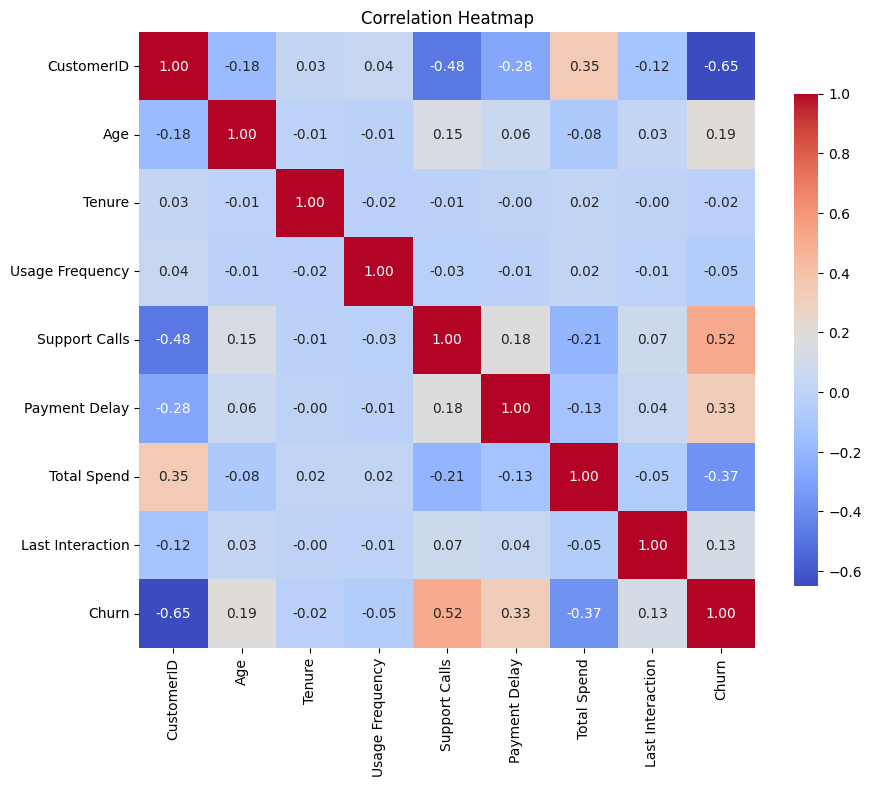

In [ ]:
# @title
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap")
plt.show()

#####  Count Plot for Each Categorical Feature:

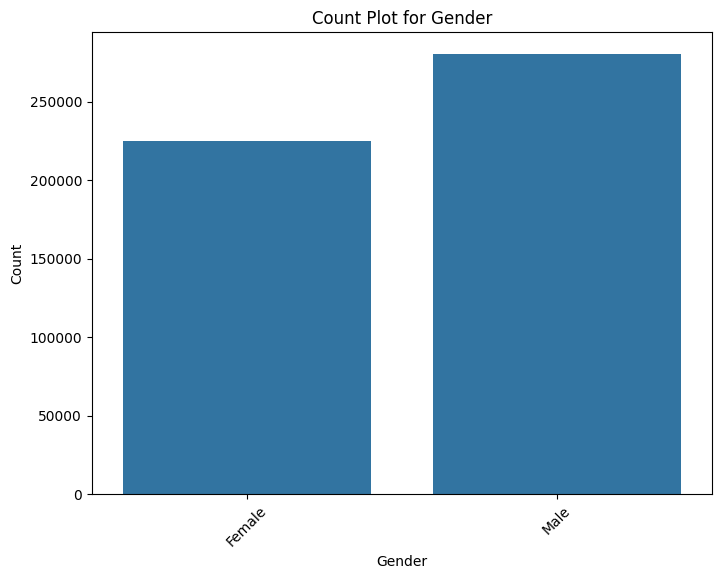

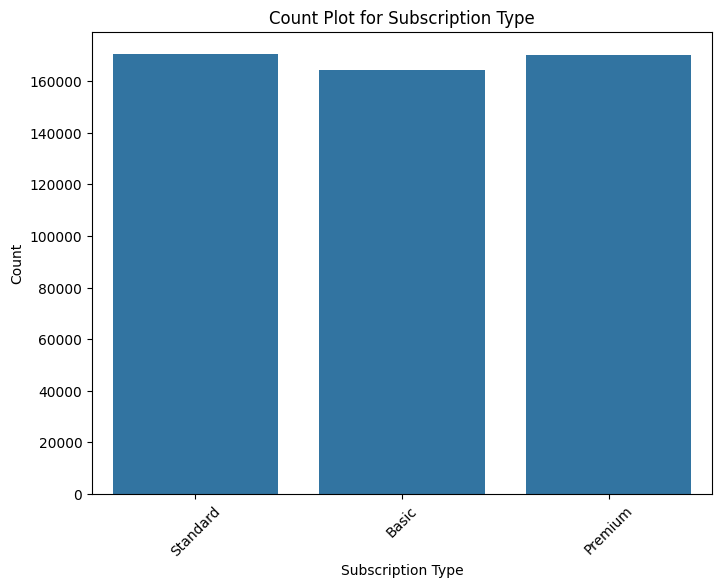

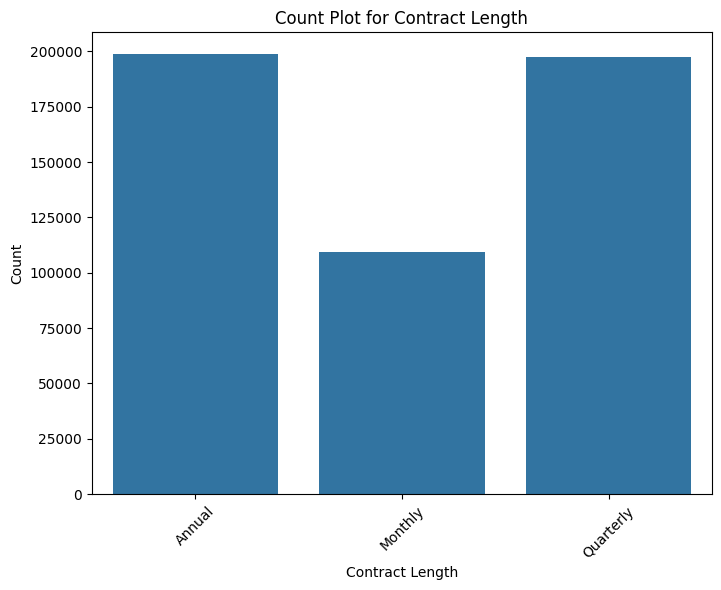

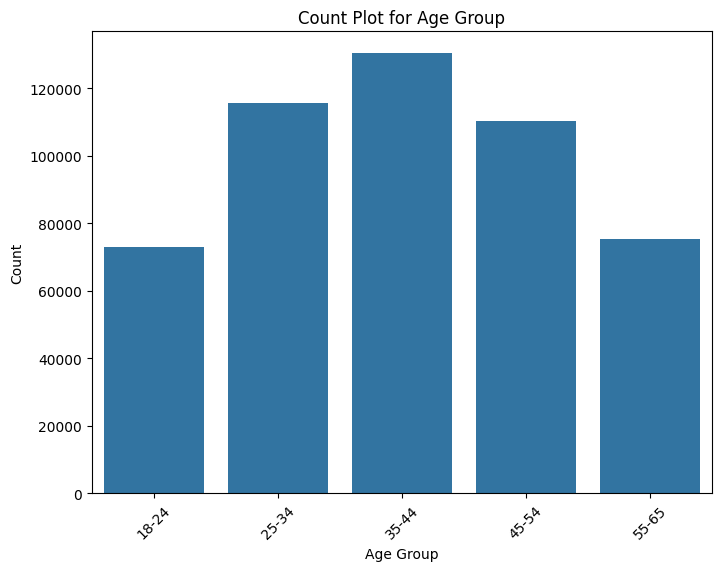

In [ ]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

##### KDE plot for numerical features by Churn:

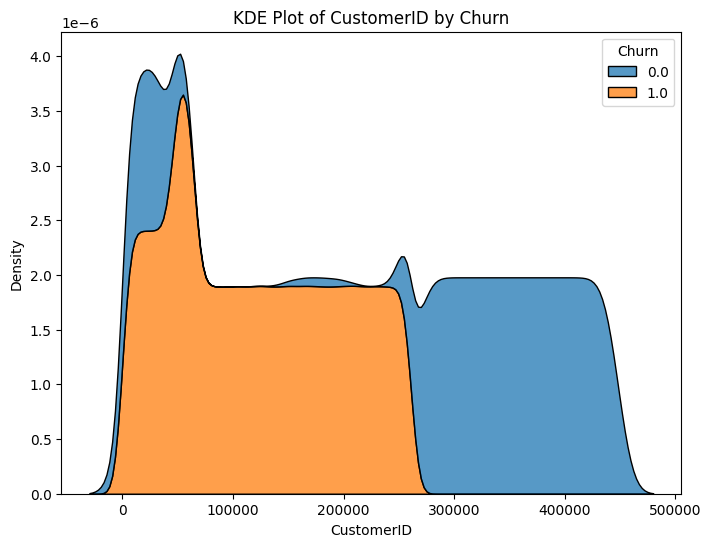

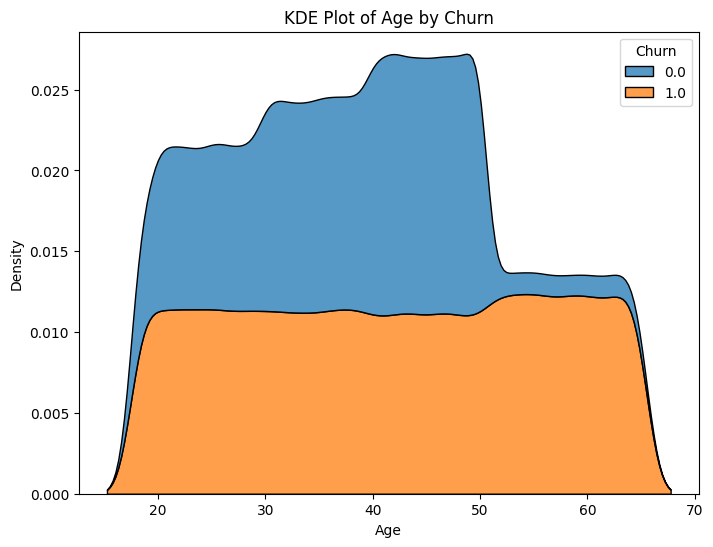

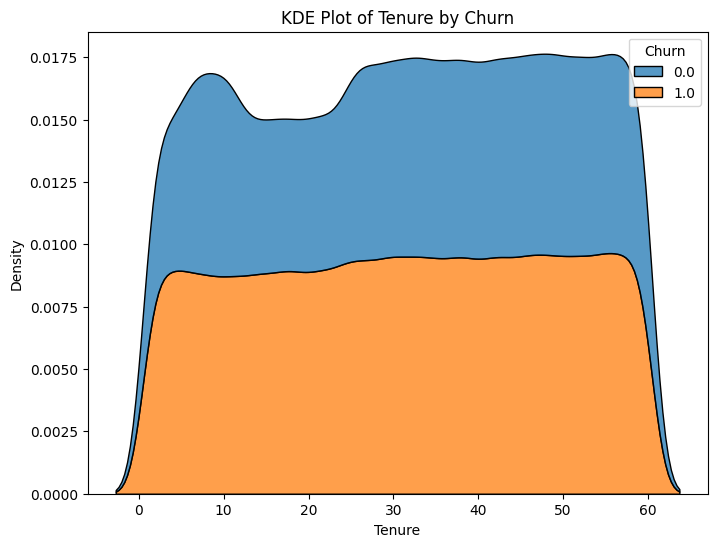

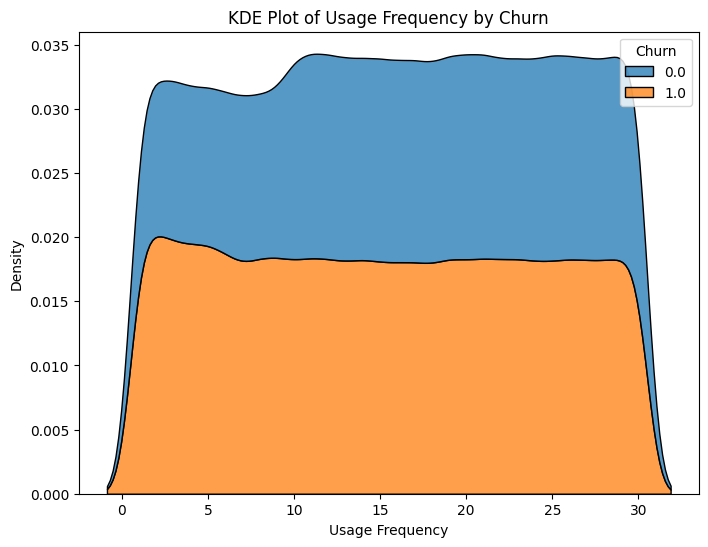

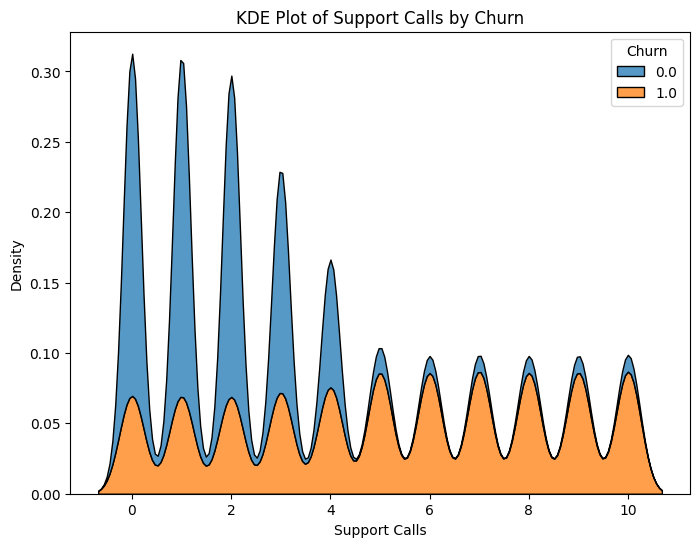

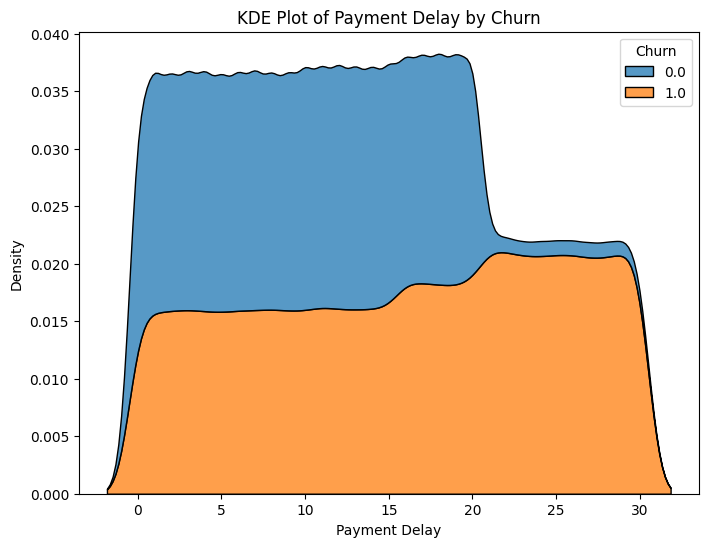

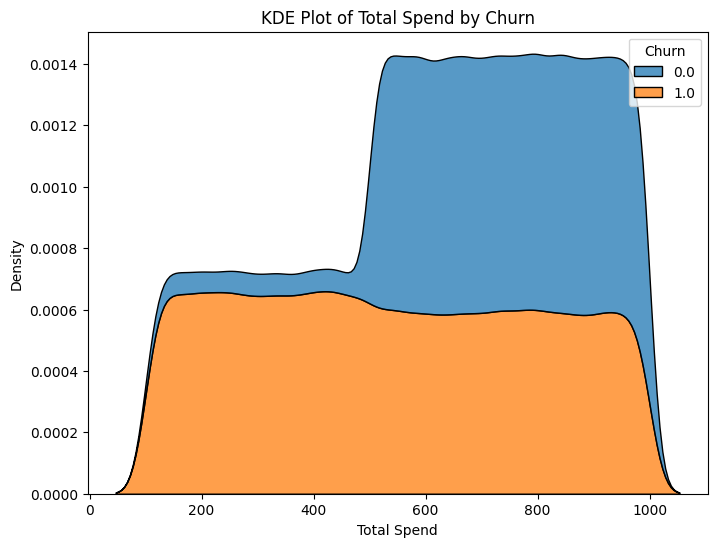

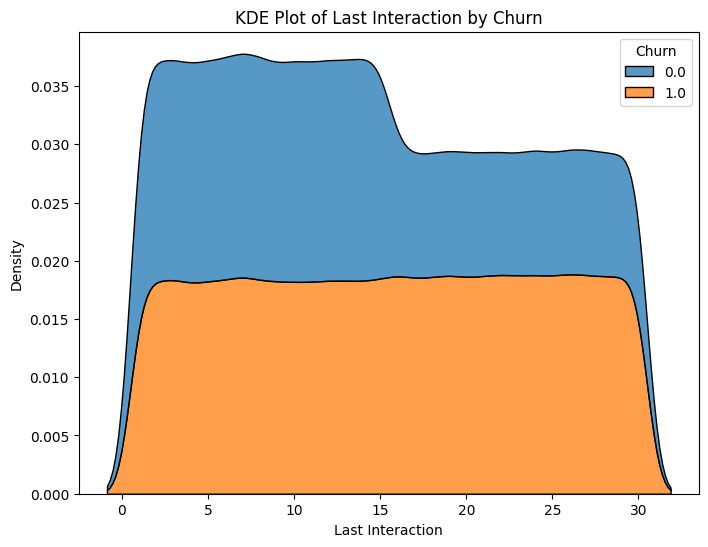

In [ ]:
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns = [col for col in numerical_columns if col != 'Churn']

for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=df, x=col, hue="Churn", multiple="stack", fill=True)
    plt.title(f'KDE Plot of {col} by Churn')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

##### Clustering

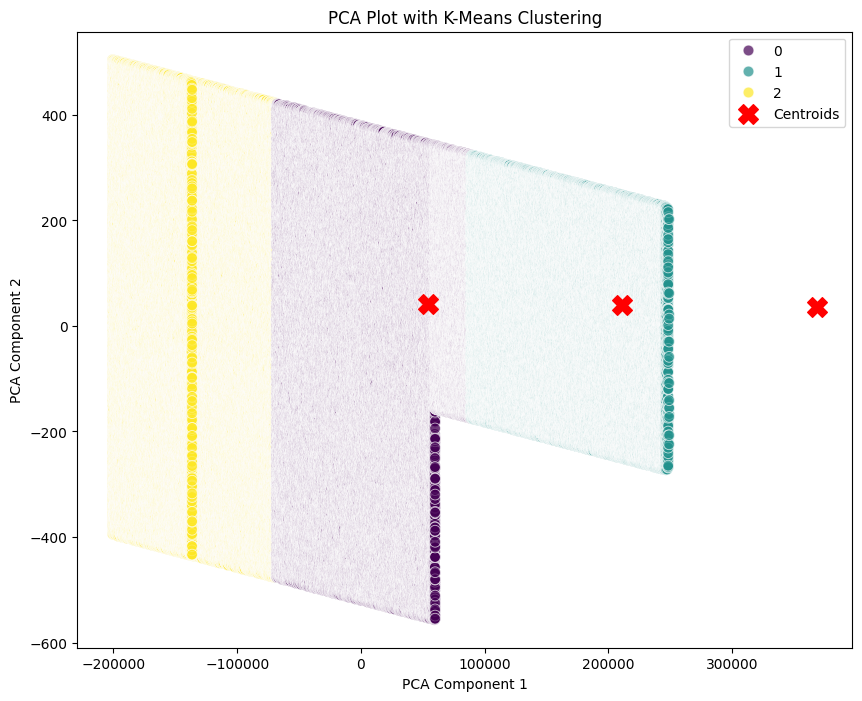

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

# Selecting numerical features only
numerical_df = df.select_dtypes(include=['number']).drop(columns=['Churn'], errors='ignore')

# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(numerical_df)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters if necessary
df['Cluster'] = kmeans.fit_predict(numerical_df)

# Plot PCA with clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['Cluster'], palette='viridis', s=60, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("PCA Plot with K-Means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

## Scale Test & Train Datasets
Note:
X_tr = copy for X_train
Y_tr = copy for Y_train
X_ts = copy for X_test
Y_ts = copy for Y_tes
the manipulations would be executed on the duplicated dataframes.

In [ ]:
from re import X
X_tr = X_train
Y_tr = Y_train
X_ts = X_test
Y_ts = Y_test

Train Transformation

# **Feature Engineering to capture anomalies**


1. 'RelativeSpend'
2. 'PaymentDelayCompare'
3. 'LastIntDays_Compare'
4. 'TotalSpendCompare'
5. 'LastInteractionCompare'
6. 'AgePaymentDelay_Compare'
7. 'SupportCallsCompare'
8. 'LastInteractionCompare_AgeGroup'
9. 'Spend_Support_Ratio_Gender_Age'
10. 'Spend_per_Interaction'
11. 'Payment_Delay_per_Tenure'
12. 'Interaction_Efficiency'
13. 'Spend_to_Usage_by_Contract'


1) Relative Spend by Category & Age

In [ ]:
X_tr['AvgSpendByGroup'] = X_tr.groupby(['Subscription Type', 'Age Group'])['Total Spend'].transform('mean')

X_tr['RelativeSpend'] = X_tr['Total Spend'] / X_tr['AvgSpendByGroup']
X_tr = X_tr.drop(columns=['AvgSpendByGroup'])

In [ ]:
X_ts['AvgSpendByGroup'] = X_ts.groupby(['Subscription Type', 'Age'])['Total Spend'].transform('mean')

X_ts['RelativeSpend'] = X_ts['Total Spend'] / X_ts['AvgSpendByGroup']
X_ts = X_ts.drop(columns=['AvgSpendByGroup'])

In [ ]:
X_tr.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Age Group,RelativeSpend
82994,85208.0,64.0,Female,7.0,21.0,9.0,22.0,Premium,Annual,460.00,24.0,55-65,0.837744
139215,143884.0,18.0,Female,22.0,20.0,3.0,30.0,Basic,Quarterly,957.00,18.0,18-24,1.544739
200786,205657.0,19.0,Male,10.0,2.0,0.0,20.0,Basic,Monthly,885.68,10.0,18-24,1.429618
12540,12541.0,48.0,Female,28.0,28.0,2.0,6.0,Premium,Monthly,453.00,22.0,45-54,0.717537
428718,435833.0,39.0,Male,41.0,12.0,2.0,1.0,Basic,Quarterly,789.99,16.0,35-44,1.230077


2) Avg Payment delay comparison
 by Contract Length type

In [ ]:
X_tr['PaymentDelayAvg'] = X_tr.groupby(['Contract Length'])['Payment Delay'].transform('mean')
X_tr['PaymentDelayCompare'] = X_tr['Payment Delay'] / X_tr['PaymentDelayAvg']

In [ ]:
X_tr = X_tr.drop(columns=['PaymentDelayAvg'])

In [ ]:
X_ts['PaymentDelayAvg'] = X_ts.groupby(['Contract Length'])['Payment Delay'].transform('mean')

X_ts['PaymentDelayCompare'] = X_ts['Payment Delay'] / X_ts['PaymentDelayAvg']
X_ts = X_ts.drop(columns=['PaymentDelayAvg'])

In [ ]:
X_tr.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Age Group,RelativeSpend,PaymentDelayCompare
82994,85208.0,64.0,Female,7.0,21.0,9.0,22.0,Premium,Annual,460.00,24.0,55-65,0.837744,1.698237
139215,143884.0,18.0,Female,22.0,20.0,3.0,30.0,Basic,Quarterly,957.00,18.0,18-24,1.544739,2.319295
200786,205657.0,19.0,Male,10.0,2.0,0.0,20.0,Basic,Monthly,885.68,10.0,18-24,1.429618,1.288816
12540,12541.0,48.0,Female,28.0,28.0,2.0,6.0,Premium,Monthly,453.00,22.0,45-54,0.717537,0.386645
428718,435833.0,39.0,Male,41.0,12.0,2.0,1.0,Basic,Quarterly,789.99,16.0,35-44,1.230077,0.077310


3) Days since Last Interaction by Contract Length and Subscription Type

In [ ]:
X_tr['AvgLastIntDays'] = X_tr.groupby(['Contract Length','Subscription Type'])['Last Interaction'].transform('mean')
X_tr['LastIntDays_Compare'] = X_tr['Last Interaction'] / X_tr['AvgLastIntDays']

In [ ]:
X_tr= X_tr.drop(columns=['AvgLastIntDays'])

In [ ]:
X_tr['AvgLastIntDays'] = X_tr.groupby(['Contract Length','Subscription Type'])['Last Interaction'].transform('mean')

X_tr['LastIntDays_Compare'] = X_tr['Last Interaction'] / X_tr['AvgLastIntDays']

In [ ]:
X_ts['AvgLastIntDays'] = X_ts.groupby(['Contract Length','Subscription Type'])['Last Interaction'].transform('mean')

X_ts['LastIntDays_Compare'] = X_ts['Last Interaction'] / X_ts['AvgLastIntDays']
X_ts= X_ts.drop(columns=['AvgLastIntDays'])

4) Contract Length Gender & Spend


In [ ]:
# Calculate average Total Spend by Contract Length and Gender in the training set
X_tr['ContractGenderSpend_Avg'] = X_tr.groupby(['Contract Length', 'Gender'])['Total Spend'].transform('mean')
X_tr['TotalSpendCompare'] = X_tr['Total Spend'] / X_tr['ContractGenderSpend_Avg']

# Repeat the same for the test set
X_ts['ContractGenderSpend_Avg'] = X_ts.groupby(['Contract Length', 'Gender'])['Total Spend'].transform('mean')
X_ts['TotalSpendCompare'] = X_ts['Total Spend'] / X_ts['ContractGenderSpend_Avg']

In [ ]:
X_tr= X_tr.drop(columns=['ContractGenderSpend_Avg'])
X_ts= X_ts.drop(columns=['ContractGenderSpend_Avg'])

5) Gender & Last Interaction Days

In [ ]:
# Calculate average Last Interaction days by Gender in the training set
X_tr['GenderLastInteraction_Avg'] = X_tr.groupby(['Gender'])['Last Interaction'].transform('mean')
X_tr['LastInteractionCompare'] = X_tr['Last Interaction'] / X_tr['GenderLastInteraction_Avg']

# Repeat the same for the test set
X_ts['GenderLastInteraction_Avg'] = X_ts.groupby(['Gender'])['Last Interaction'].transform('mean')
X_ts['LastInteractionCompare'] = X_ts['Last Interaction'] / X_ts['GenderLastInteraction_Avg']


In [ ]:
X_tr= X_tr.drop(columns=['GenderLastInteraction_Avg'])
X_ts= X_ts.drop(columns=['GenderLastInteraction_Avg'])

6) Gender Usage-Age Group-Payment Delay

In [ ]:
X_tr['AgeGenderPaymentDelay'] = X_tr.groupby(['Age Group','Gender'])['Payment Delay'].transform('mean')
X_tr['AgePaymentDelay_Compare'] = X_tr['Payment Delay']/X_tr['AgeGenderPaymentDelay']

X_ts['AgeGenderPaymentDelay'] = X_ts.groupby(['Age Group','Gender'])['Payment Delay'].transform('mean')
X_ts['AgePaymentDelay_Compare'] = X_ts['Payment Delay']/X_ts['AgeGenderPaymentDelay']

In [ ]:
X_tr= X_tr.drop(columns=['AgeGenderPaymentDelay'])
X_ts= X_ts.drop(columns=['AgeGenderPaymentDelay'])

7) Gender, Subscription Type, Support Calls

In [ ]:
# Calculate average Support Calls by Gender and Subscription Type in the training set
X_tr['GenderSubTypeSupport_Avg'] = X_tr.groupby(['Gender', 'Subscription Type'])['Support Calls'].transform('mean')
X_tr['SupportCallsCompare'] = X_tr['Support Calls'] / X_tr['GenderSubTypeSupport_Avg']

# Repeat the same for the test set
X_ts['GenderSubTypeSupport_Avg'] = X_ts.groupby(['Gender', 'Subscription Type'])['Support Calls'].transform('mean')
X_ts['SupportCallsCompare'] = X_ts['Support Calls'] / X_ts['GenderSubTypeSupport_Avg']


In [ ]:
X_tr= X_tr.drop(columns=['GenderSubTypeSupport_Avg'])
X_ts= X_ts.drop(columns=['GenderSubTypeSupport_Avg'])

8) AgeGroup- Last Interaction Days

In [ ]:
# Calculate average Last Interaction days by Age Group in the training set
X_tr['AgeGroupLastInteraction_Avg'] = X_tr.groupby(['Age Group'])['Last Interaction'].transform('mean')
X_tr['LastInteractionCompare_AgeGroup'] = X_tr['AgeGroupLastInteraction_Avg'] -  X_tr['Last Interaction']

# Repeat the same for the test set
X_ts['AgeGroupLastInteraction_Avg'] = X_ts.groupby(['Age Group'])['Last Interaction'].transform('mean')
X_ts['LastInteractionCompare_AgeGroup'] =  X_ts['AgeGroupLastInteraction_Avg'] - X_ts['Last Interaction']

In [ ]:
X_tr.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,...,RelativeSpend,PaymentDelayCompare,LastIntDays_Compare,AvgLastIntDays,TotalSpendCompare,LastInteractionCompare,AgePaymentDelay_Compare,SupportCallsCompare,AgeGroupLastInteraction_Avg,LastInteractionCompare_AgeGroup
82994,85208.0,64.0,Female,7.0,21.0,9.0,22.0,Premium,Annual,460.00,...,0.837744,1.698237,1.675865,14.320960,0.743543,1.777682,1.417362,2.181996,15.484683,-8.515317
139215,143884.0,18.0,Female,22.0,20.0,3.0,30.0,Basic,Quarterly,957.00,...,1.544739,2.319295,1.255575,14.336061,1.549462,1.333261,2.129119,0.719453,14.620783,-3.379217
200786,205657.0,19.0,Male,10.0,2.0,0.0,20.0,Basic,Monthly,885.68,...,1.429618,1.288816,0.645145,15.500395,1.613069,0.646126,1.530333,0.000000,14.620783,4.620783
12540,12541.0,48.0,Female,28.0,28.0,2.0,6.0,Premium,Monthly,453.00,...,0.717537,0.386645,1.423598,15.453798,0.822452,1.629541,0.430880,0.484888,14.537833,-7.462167
428718,435833.0,39.0,Male,41.0,12.0,2.0,1.0,Basic,Quarterly,789.99,...,1.230077,0.077310,1.116067,14.336061,1.203954,1.033802,0.080825,0.548557,14.286696,-1.713304


In [ ]:
X_tr= X_tr.drop(columns=['AgeGroupLastInteraction_Avg'])
X_ts= X_ts.drop(columns=['AgeGroupLastInteraction_Avg'])

9) Spend-to-Support Ratio by Gender and Age

This feature could indicate if certain demographics are more demanding on support relative to their spending, which might signal potential churn or issues with service.


In [ ]:
X_tr['Spend_Support_Ratio_Gender_Age'] = X_tr['Total Spend'] / X_tr['Support Calls']
X_tr['Spend_Support_Ratio_Gender_Age'] = X_tr.groupby(['Gender', 'Age Group'])['Spend_Support_Ratio_Gender_Age'].transform('mean')

X_ts['Spend_Support_Ratio_Gender_Age'] = X_ts['Total Spend'] / X_ts['Support Calls']
X_ts['Spend_Support_Ratio_Gender_Age'] = X_ts.groupby(['Gender', 'Age Group'])['Spend_Support_Ratio_Gender_Age'].transform('mean')

10) Spend per Interaction

In [ ]:
X_tr['Spend_per_Interaction'] = X_tr['Total Spend'] / (X_tr['Last Interaction'] + 1)  # Adding 1 to avoid division by zero
X_ts['Spend_per_Interaction'] = X_ts['Total Spend'] / (X_ts['Last Interaction'] + 1)  # Adding 1 to avoid division by zero

11) Payment Delay Ratio by Subscription Type

In [ ]:
X_tr['Payment_Delay_per_Tenure'] = X_tr['Payment Delay'] / (X_tr['Tenure'] + 1)
X_ts['Payment_Delay_per_Tenure'] = X_ts['Payment Delay'] / (X_ts['Tenure'] + 1)

12) Interaction Efficiency Ratio

In [ ]:
X_tr['Interaction_Efficiency'] = X_tr['Last Interaction'] / (X_tr['Support Calls'] + 1)
X_ts['Interaction_Efficiency'] = X_ts['Last Interaction'] / (X_ts['Support Calls'] + 1)

13) Spend-to-Usage Intensity by Contract Length

In [ ]:
X_tr['Spend_to_Usage_by_Contract'] = X_tr.groupby('Contract Length')['Total Spend'].transform('sum') / X_tr['Usage Frequency']
X_ts['Spend_to_Usage_by_Contract'] = X_ts.groupby('Contract Length')['Total Spend'].transform('sum') / X_ts['Usage Frequency']

Final Dataset After Cleaning & Feature Engineering

In [ ]:
X_tr.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,...,TotalSpendCompare,LastInteractionCompare,AgePaymentDelay_Compare,SupportCallsCompare,LastInteractionCompare_AgeGroup,Spend_Support_Ratio_Gender_Age,Spend_per_Interaction,Payment_Delay_per_Tenure,Interaction_Efficiency,Spend_to_Usage_by_Contract
82994,85208.0,64.0,Female,7.0,21.0,9.0,22.0,Premium,Annual,460.00,...,0.743543,1.777682,1.417362,2.181996,-8.515317,inf,18.400000,2.750000,2.400000,4.833959e+06
139215,143884.0,18.0,Female,22.0,20.0,3.0,30.0,Basic,Quarterly,957.00,...,1.549462,1.333261,2.129119,0.719453,-3.379217,inf,50.368421,1.304348,4.500000,5.052962e+06
200786,205657.0,19.0,Male,10.0,2.0,0.0,20.0,Basic,Monthly,885.68,...,1.613069,0.646126,1.530333,0.000000,4.620783,inf,80.516364,1.818182,10.000000,2.405197e+07
12540,12541.0,48.0,Female,28.0,28.0,2.0,6.0,Premium,Monthly,453.00,...,0.822452,1.629541,0.430880,0.484888,-7.462167,inf,19.695652,0.206897,7.333333,1.717998e+06
428718,435833.0,39.0,Male,41.0,12.0,2.0,1.0,Basic,Quarterly,789.99,...,1.203954,1.033802,0.080825,0.548557,-1.713304,inf,46.470000,0.023810,5.333333,8.421604e+06


In [ ]:
num_data_points = X_train.shape[0]
print("Number of data points in X_train:", num_data_points)


Number of data points in X_train: 404164


END OF FEATURE ENGINEERING
(use X_ts, X_tr for model)



# **Random Forest**

In [ ]:
X_tr

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,...,TotalSpendCompare,LastInteractionCompare,AgePaymentDelay_Compare,SupportCallsCompare,LastInteractionCompare_AgeGroup,Spend_Support_Ratio_Gender_Age,Spend_per_Interaction,Payment_Delay_per_Tenure,Interaction_Efficiency,Spend_to_Usage_by_Contract
82994,85208.0,64.0,Female,7.0,21.0,9.0,22.0,Premium,Annual,460.00,...,0.743543,1.777682,1.417362,2.181996,-8.515317,inf,18.400000,2.750000,2.400000,4.833959e+06
139215,143884.0,18.0,Female,22.0,20.0,3.0,30.0,Basic,Quarterly,957.00,...,1.549462,1.333261,2.129119,0.719453,-3.379217,inf,50.368421,1.304348,4.500000,5.052962e+06
200786,205657.0,19.0,Male,10.0,2.0,0.0,20.0,Basic,Monthly,885.68,...,1.613069,0.646126,1.530333,0.000000,4.620783,inf,80.516364,1.818182,10.000000,2.405197e+07
12540,12541.0,48.0,Female,28.0,28.0,2.0,6.0,Premium,Monthly,453.00,...,0.822452,1.629541,0.430880,0.484888,-7.462167,inf,19.695652,0.206897,7.333333,1.717998e+06
428718,435833.0,39.0,Male,41.0,12.0,2.0,1.0,Basic,Quarterly,789.99,...,1.203954,1.033802,0.080825,0.548557,-1.713304,inf,46.470000,0.023810,5.333333,8.421604e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254852,261966.0,33.0,Male,33.0,14.0,1.0,1.0,Premium,Annual,681.30,...,1.039881,1.486090,0.078890,0.280692,-8.589702,inf,28.387500,0.029412,11.500000,7.250939e+06
425578,432693.0,34.0,Male,17.0,15.0,0.0,6.0,Standard,Quarterly,626.82,...,0.955281,0.452288,0.473339,0.000000,7.410298,inf,78.352500,0.333333,7.000000,6.737283e+06
1826,1827.0,23.0,Female,2.0,4.0,1.0,27.0,Basic,Quarterly,419.00,...,0.678396,0.888841,1.916207,0.239818,2.620783,inf,32.230769,9.000000,6.000000,2.526481e+07
156190,161001.0,54.0,Male,40.0,26.0,6.0,4.0,Basic,Annual,499.00,...,0.761633,1.615315,0.311014,1.645671,-10.462167,inf,19.192308,0.097561,3.571429,3.904352e+06


Accuracy: 0.921467717392649
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.86      0.91     36028
         1.0       0.90      0.97      0.93     44805

    accuracy                           0.92     80833
   macro avg       0.93      0.92      0.92     80833
weighted avg       0.92      0.92      0.92     80833



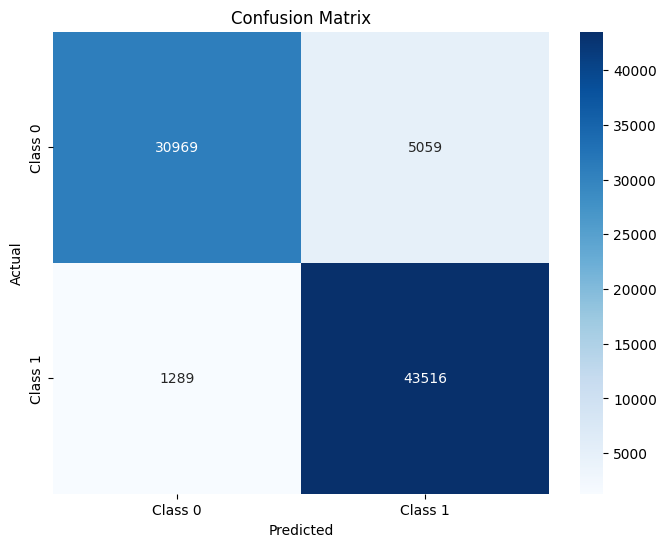

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


X = X_tr[['PaymentDelayCompare', 'LastIntDays_Compare', 'TotalSpendCompare',
           'LastInteractionCompare', 'AgePaymentDelay_Compare',
           'SupportCallsCompare', 'LastInteractionCompare_AgeGroup','TotalSpendCompare','AgePaymentDelay_Compare']]


Y = Y_train


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


rf_model.fit(X_train, Y_train)


Y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)


print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)


conf_matrix = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
Y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

errors = abs(Y_test - Y_pred_prob)

threshold = 0.5

outliers = errors > threshold
outlier_indices = outliers[outliers].index
print(f"Outliers detected at indices: {outlier_indices}")

Outliers detected at indices: Index([ 36128,  18336,   9858,  43143,  45392, 181674,   2992,  92924,  23854,
        36038,
       ...
         8241,  13853,  14134,  49175,  10971,  30498,  10669, 182059,  25842,
         4315],
      dtype='int64', length=6294)


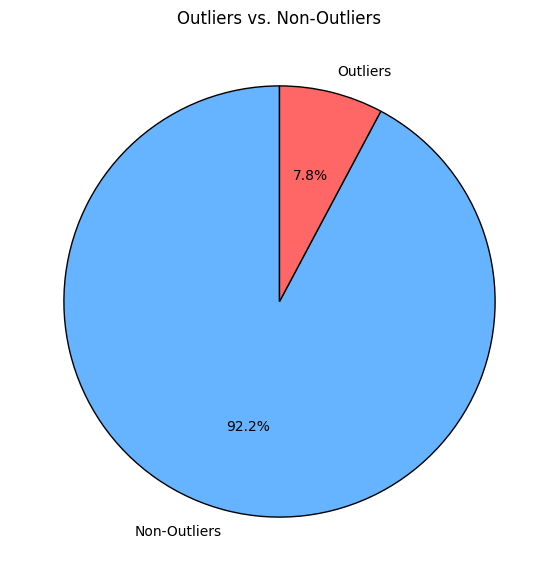

Number of Outliers: 6294
Percentage of Outliers: 7.79%


In [ ]:
import matplotlib.pyplot as plt

outliers_count = sum(outliers)
# Get total number of samples from the length of the 'outliers' Series
total_samples = len(outliers)
non_outliers_count = total_samples - outliers_count

# Calculate the percentage of outliers
outliers_percentage = (outliers_count / total_samples) * 100

labels = ['Non-Outliers', 'Outliers']
sizes = [non_outliers_count, outliers_count]
colors = ['#66b3ff', '#ff6666']  # Light blue for non-outliers, red for outliers

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Outliers vs. Non-Outliers')
plt.show()

print(f"Number of Outliers: {outliers_count}")
print(f"Percentage of Outliers: {outliers_percentage:.2f}%")

In [ ]:
print(X_train.dtypes)
print(Y_train.dtypes)

PaymentDelayCompare                float64
LastIntDays_Compare                float64
TotalSpendCompare                  float64
LastInteractionCompare             float64
AgePaymentDelay_Compare            float64
SupportCallsCompare                float64
LastInteractionCompare_AgeGroup    float64
TotalSpendCompare                  float64
AgePaymentDelay_Compare            float64
dtype: object
float64


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


X = X_tr[['PaymentDelayCompare', 'LastIntDays_Compare', 'TotalSpendCompare',
           'LastInteractionCompare', 'AgePaymentDelay_Compare',
           'SupportCallsCompare', 'LastInteractionCompare_AgeGroup','TotalSpendCompare','AgePaymentDelay_Compare']]

Y = Y_train


#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)




Accuracy: 0.8926057427040937
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.87      0.88     36028
         1.0       0.90      0.91      0.90     44805

    accuracy                           0.89     80833
   macro avg       0.89      0.89      0.89     80833
weighted avg       0.89      0.89      0.89     80833



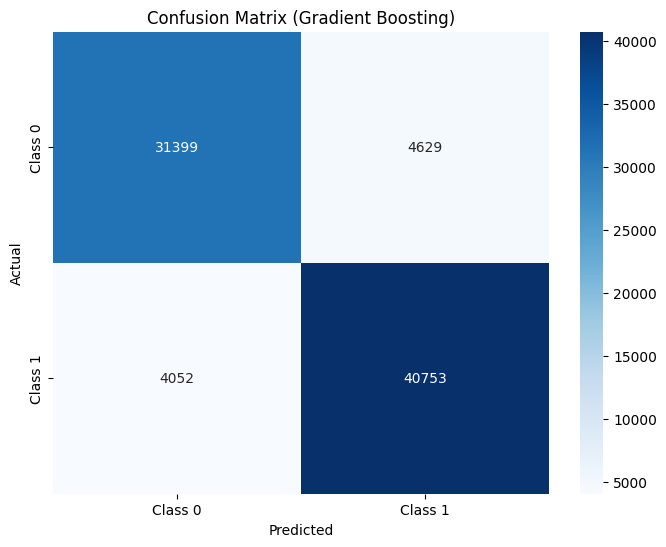

In [ ]:

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)


gb_model.fit(X_train, Y_train)


Y_pred = gb_model.predict(X_test)


accuracy = accuracy_score(Y_test, Y_pred)


report = classification_report(Y_test, Y_pred)


print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)


conf_matrix = confusion_matrix(Y_test, Y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (Gradient Boosting)')
plt.show()

In [ ]:
Y_pred_prob = gb_model.predict_proba(X_train)[:, 1]


errors = abs(Y - Y_pred_prob)
threshold = 0.5
outliers = errors > threshold


outlier_indices = np.where(outliers)[0]
print(f"Outliers detected at indices: {outlier_indices}")


Outliers detected at indices: [     7     11     12 ... 323279 323289 323320]


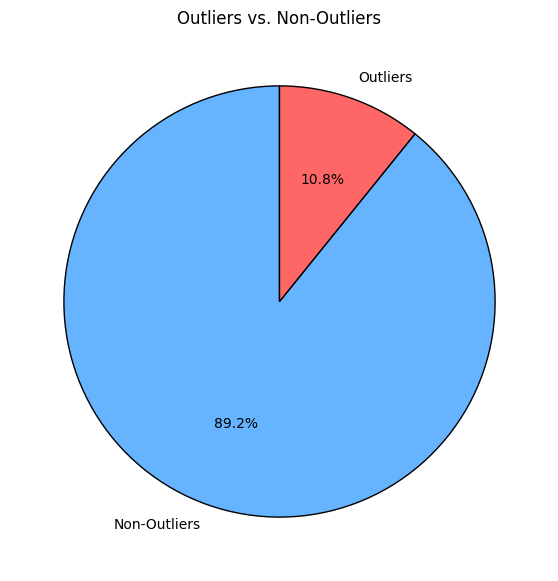

Number of Outliers: 34969
Percentage of Outliers: 10.82%


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

outliers_count = sum(outliers)
non_outliers_count = len(Y) - outliers_count


outliers_percentage = (outliers_count / len(Y)) * 100

labels = ['Non-Outliers', 'Outliers']
sizes = [non_outliers_count, outliers_count]
colors = ['#66b3ff', '#ff6666']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Outliers vs. Non-Outliers')
plt.show()


print(f"Number of Outliers: {outliers_count}")
print(f"Percentage of Outliers: {outliers_percentage:.2f}%")


In [ ]:
import joblib
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']